In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import wandb
import os

model_name = "model-tk45el88"

if not os.path.isdir(model_name):
    api = wandb.Api()
    artifact = api.artifact(f"fdlx/sdofm/{model_name}:best", type="model")
    artifact.download(model_name)

wandb: Downloading large artifact model-tk45el88:best, 1188.96MB. 1 files... 
wandb:   1 of 1 files downloaded.  


KeyboardInterrupt: 

In [17]:
from sdofm.pretraining import SAMAE
from pathlib import Path
import torch

# model = MAE.load_from_checkpoint(Path(model_name) / "model.ckpt")
# model = MAE.load_from_checkpoint('/home/walsh/SDO-FM/artifacts/model-q1l4qkjj:v4/model.ckpt')#, map_location=torch.device('cpu'))
ckpt_path = "/home/walsh/SDO-FM/outputs/2024-07-12/10-48-46/sdofm/flp35noh/checkpoints/epoch=1-step=7020.ckpt"
model = SAMAE.load_from_checkpoint(ckpt_path, map_location=torch.device("cpu"))

In [11]:
# model = MAE.load_from_checkpoint("../mae128-epoch=17-step=139302.ckpt")

/opt/conda/envs/sdofm/lib/python3.10/site-packages/lightning/pytorch/utilities/migration/utils.py:56: The loaded checkpoint was produced with Lightning v2.2.5, which is newer than your current Lightning version: v2.2.1


In [5]:
import omegaconf
from sdofm.datasets import SDOMLDataModule, HelioProjectedSDOMLDataModule
import os

# cfg = omegaconf.OmegaConf.load("../experiments/pretrain_32.2M_samae_tpu_sweep.yaml")
cfg_path = "../experiments/pretrain_32.2M_samae_HP.yaml"
cfg = omegaconf.OmegaConf.load(cfg_path)

# data_module = SDOMLDataModule(
data_module = HelioProjectedSDOMLDataModule(
    # hmi_path=os.path.join(
    #     cfg.data.sdoml.base_directory, cfg.data.sdoml.sub_directory.hmi
    # ),
    hmi_path=None,
    aia_path=os.path.join(
        cfg.data.sdoml.base_directory,
        cfg.data.sdoml.sub_directory.aia,
    ),
    # aia_path=None,
    eve_path=None,
    components=cfg.data.sdoml.components,
    wavelengths=cfg.data.sdoml.wavelengths,
    ions=cfg.data.sdoml.ions,
    frequency=cfg.data.sdoml.frequency,
    batch_size=cfg.model.opt.batch_size,
    num_workers=cfg.data.num_workers,
    val_months=cfg.data.month_splits.val,
    test_months=cfg.data.month_splits.test,
    holdout_months=cfg.data.month_splits.holdout,
    cache_dir=os.path.join(
        cfg.data.sdoml.base_directory,
        cfg.data.sdoml.sub_directory.cache,
    ),
    min_date=cfg.data.min_date,
    max_date=cfg.data.max_date,
    num_frames=1,
    drop_frame_dim=False,
)
data_module.setup()

[* CACHE SYSTEM *] Found cached index data in /mnt/sdoml/cache/aligndata_AIA_FULL_12min.csv.
[* CACHE SYSTEM *] Found cached normalization data in /mnt/sdoml/cache/normalizations_AIA_FULL_12min.json.
[* CACHE SYSTEM *] Found cached HMI mask data in /mnt/sdoml/cache/hmi_mask_512x512.npy.


In [6]:
import matplotlib.pyplot as plt

In [7]:
data = next(iter(data_module.valid_ds))
data.shape

(9, 1, 512, 512)

In [12]:
# run through model
model(data)

ValueError: not enough values to unpack (expected 5, got 4)

In [11]:
data_module.aia_data[2020]

<zarr.hierarchy.Group '/2020'>

In [14]:
a = list(data_module.aia_data[2020]["94A"].attrs.items())
len(a)

179

In [26]:
len(a[1][1])

85998

In [28]:
(60 * 24 * 365) / 6

87600.0

In [7]:
data.transpose([1, 0, 2, 3]).shape

(1, 9, 512, 512)

In [5]:
data = next(iter(data_module.valid_ds))
data.shape

(9, 1, 512, 512)

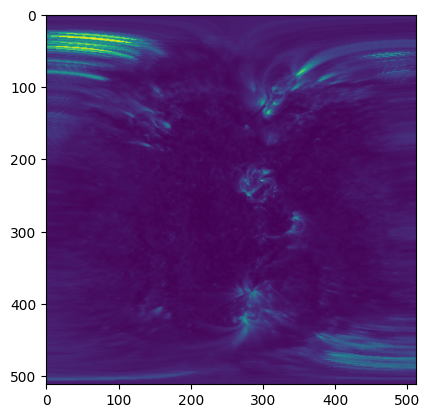

In [11]:
plt.imshow(data[3, 0, :, :])

(array([3.0863e+04, 7.0785e+04, 4.8183e+04, 4.0124e+04, 2.4005e+04,
        1.2789e+04, 8.0680e+03, 5.7980e+03, 3.6300e+03, 3.4870e+03,
        1.8720e+03, 1.6590e+03, 1.5540e+03, 8.3000e+02, 1.2650e+03,
        1.0310e+03, 6.9700e+02, 7.0700e+02, 3.1900e+02, 5.3500e+02,
        3.9700e+02, 3.5000e+02, 2.0900e+02, 1.9400e+02, 2.2200e+02,
        3.7000e+02, 1.7400e+02, 3.4700e+02, 3.6000e+01, 3.6800e+02,
        2.1000e+01, 3.0000e+01, 1.4300e+02, 2.6000e+01, 3.1000e+01,
        7.5000e+01, 8.2000e+01, 7.3000e+01, 2.1200e+02, 6.6000e+01,
        9.2000e+01, 8.1000e+01, 4.0000e+00, 1.0000e+00, 2.3000e+01,
        1.0500e+02, 0.0000e+00, 1.5000e+02, 0.0000e+00, 6.1000e+01]),
 array([-0.71214426, -0.11197036,  0.48820356,  1.08837748,  1.68855131,
         2.28872514,  2.88889909,  3.48907304,  4.08924675,  4.6894207 ,
         5.28959465,  5.8897686 ,  6.48994255,  7.0901165 ,  7.69029045,
         8.2904644 ,  8.89063835,  9.4908123 , 10.09098625, 10.6911602 ,
        11.29133415, 11.89

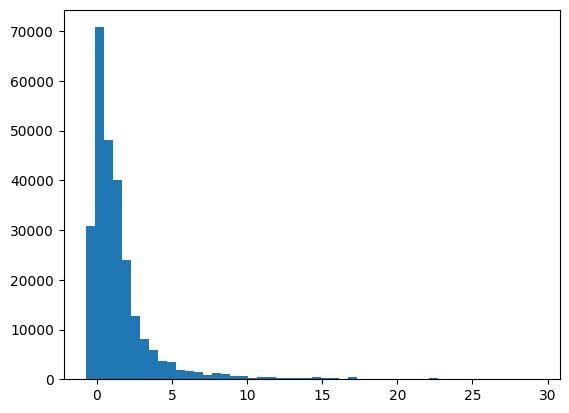

In [23]:
plt.hist(data[3, :, :].reshape(-1), bins=50)

In [19]:
data[3, :, :].min()

-0.71214426

In [12]:
data.shape

(9, 512, 512)

In [6]:
import torch

In [12]:
data.shape

(9, 5, 512, 512)

In [18]:
loss, x_hat, mask = model(torch.Tensor([data]))

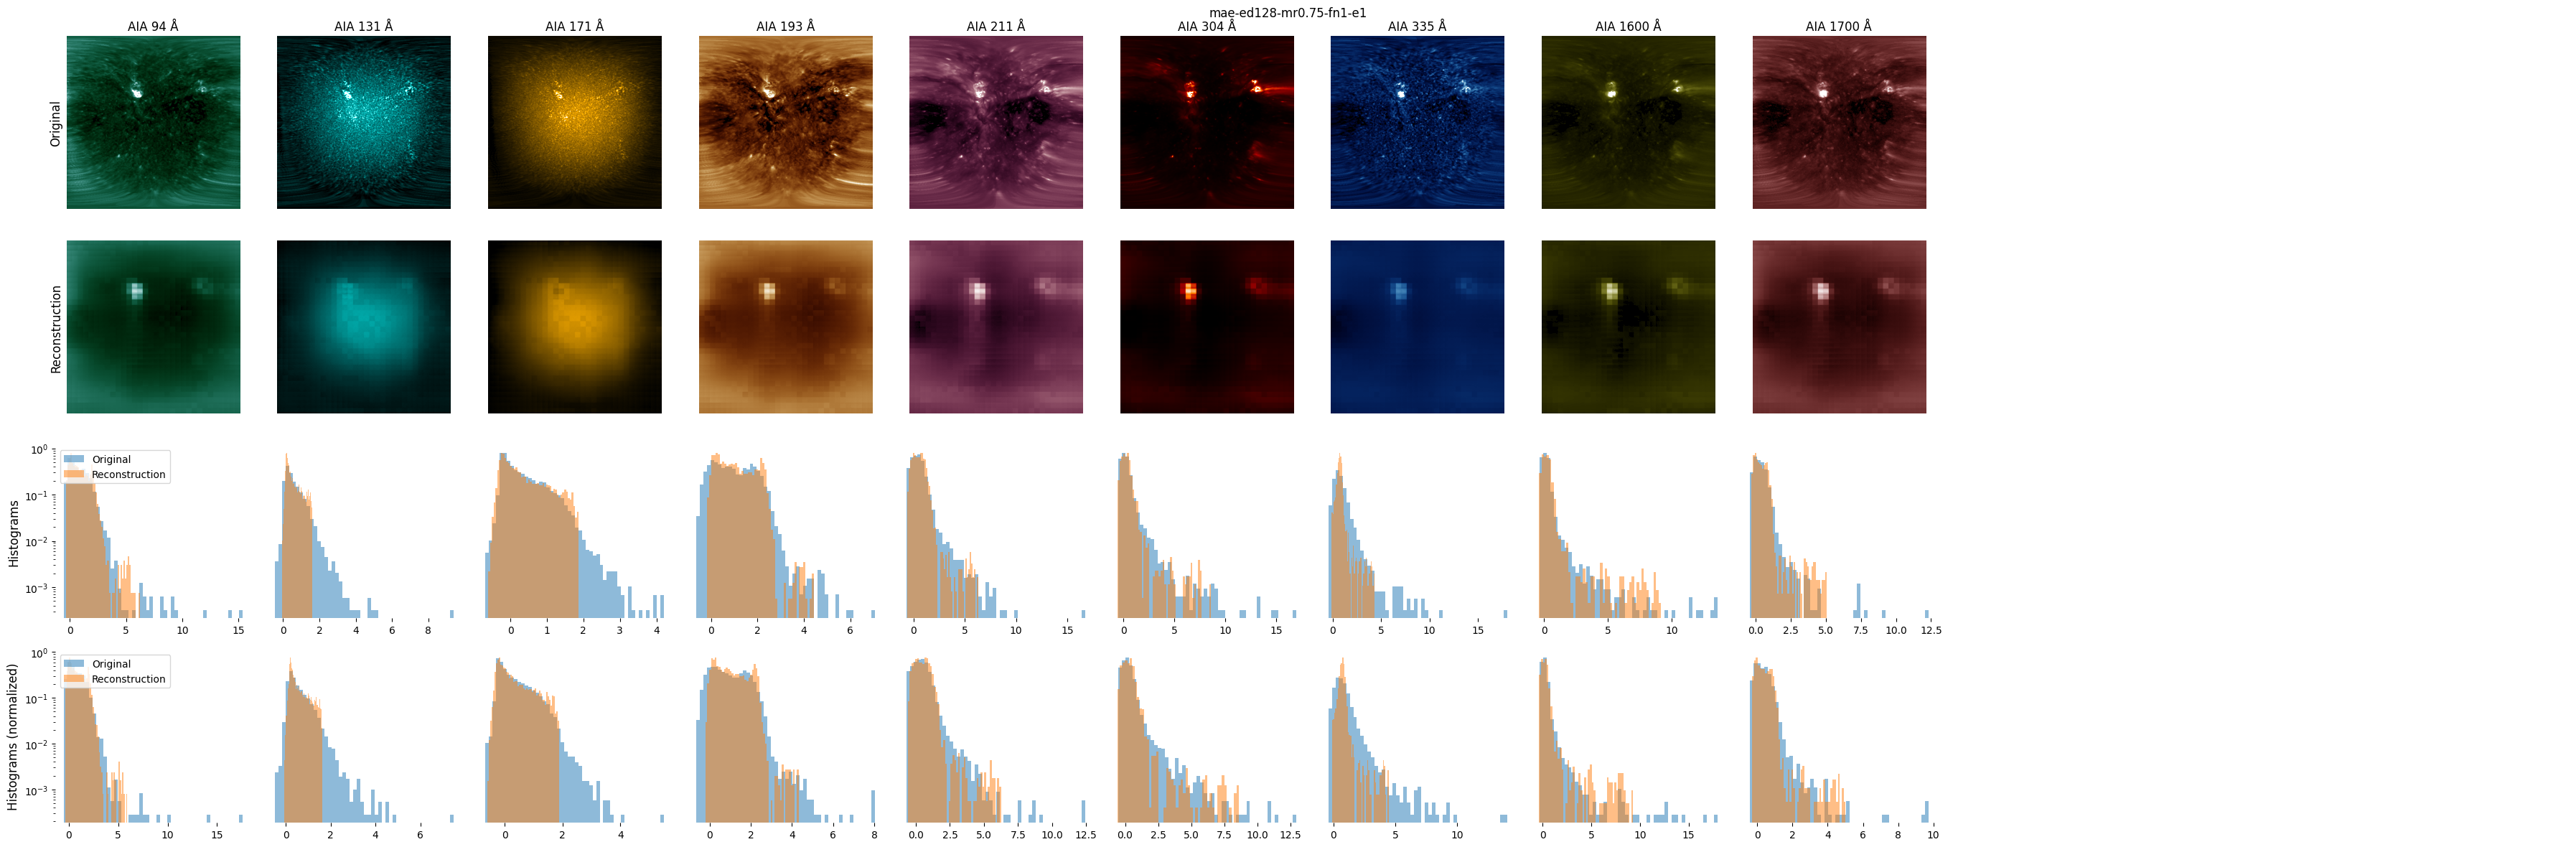

In [20]:
from sdofm.visualisation.sdo import sdo_reconstruction_plot

sdo_reconstruction_plot(
    torch.Tensor(data[:, 0, :, :]),
    x_hat[0, :, 0, :, :],
    title="mae-ed128-mr0.75-fn1-e1",
)

(array([1.6370e+05, 9.2096e+04, 5.6760e+03, 5.4500e+02, 1.0000e+02,
        1.9000e+01, 5.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([-0.63633329,  0.53869414,  1.71372163,  2.88874912,  4.06377649,
         5.23880386,  6.41383123,  7.58885908,  8.76388645,  9.93891335,
        11.11394119]),
 <BarContainer object of 10 artists>)

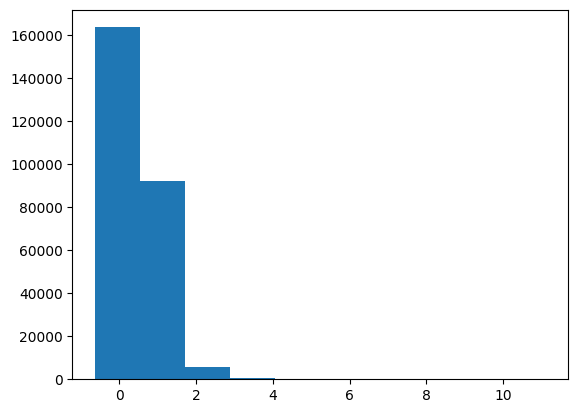

In [34]:
plt.hist(data[1, 0, :, :].reshape(-1))

In [30]:
import numpy as np

In [39]:
(data[1, 0, :, :] ** 2).max()

123.51969

/var/tmp/ipykernel_1973805/3439835910.py:1: RuntimeWarning: invalid value encountered in log
  plt.hist(np.log(data[1,0,:,:]).reshape(-1), bins=30)


(array([2.5000e+01, 0.0000e+00, 2.1000e+01, 2.7400e+02, 1.0300e+02,
        3.9000e+01, 2.8000e+01, 1.8300e+02, 8.2000e+01, 7.0000e+01,
        3.7900e+02, 4.1200e+02, 5.8400e+02, 1.2400e+03, 2.9590e+03,
        3.7920e+03, 5.9970e+03, 1.0982e+04, 1.9953e+04, 3.1456e+04,
        4.0245e+04, 3.8782e+04, 3.6531e+04, 3.4409e+04, 2.0574e+04,
        5.6010e+03, 1.1180e+03, 2.3500e+02, 2.6000e+01, 3.0000e+00]),
 array([-8.9443779 , -8.56595898, -8.1875391 , -7.80912018, -7.43070078,
        -7.05228138, -6.67386246, -6.29544306, -5.91702366, -5.53860426,
        -5.16018534, -4.78176594, -4.40334654, -4.02492714, -3.64650798,
        -3.26808882, -2.88966966, -2.51125026, -2.1328311 , -1.7544117 ,
        -1.37599242, -0.9975732 , -0.61915392, -0.24073464,  0.13768463,
         0.51610392,  0.8945232 ,  1.27294242,  1.6513617 ,  2.0297811 ,
         2.40820026]),
 <BarContainer object of 30 artists>)

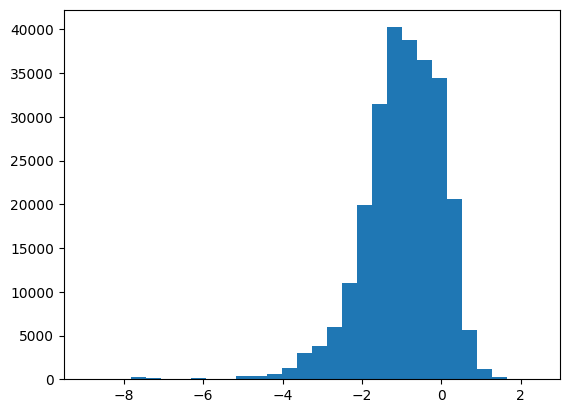

In [40]:
plt.hist(np.log(data[1, 0, :, :]).reshape(-1), bins=30)

In [21]:
data_module.normalizations

{'AIA': {'131A': {'sum': 384001740000.0,
   'max': 6183.1904,
   'std': 4.9990253,
   'skew': 56.855114,
   'kurtosis': 44441.336,
   'image_count': 450432,
   'pixel_count': 118078046208,
   'mean': 3.252101038558539},
  '1600A': {'sum': 4231806000000.0,
   'max': 5671.4297,
   'std': 37.220505,
   'skew': 0.5736402,
   'kurtosis': 2.2550263,
   'image_count': 450432,
   'pixel_count': 118078046208,
   'mean': 35.839058947854504},
  '1700A': {'sum': 52611726000000.0,
   'max': 29252.732,
   'std': 470.13464,
   'skew': 0.5904401,
   'kurtosis': -0.80091023,
   'image_count': 450432,
   'pixel_count': 118078046208,
   'mean': 445.56738420005684},
  '171A': {'sum': 13046049000000.0,
   'max': 40491.76,
   'std': 126.601555,
   'skew': 3.688141,
   'kurtosis': 38.220615,
   'image_count': 450432,
   'pixel_count': 118078046208,
   'mean': 110.48666169366297},
  '193A': {'sum': 13974062000000.0,
   'max': 54646.72,
   'std': 157.77448,
   'skew': 5.066054,
   'kurtosis': 61.212814,
   'im

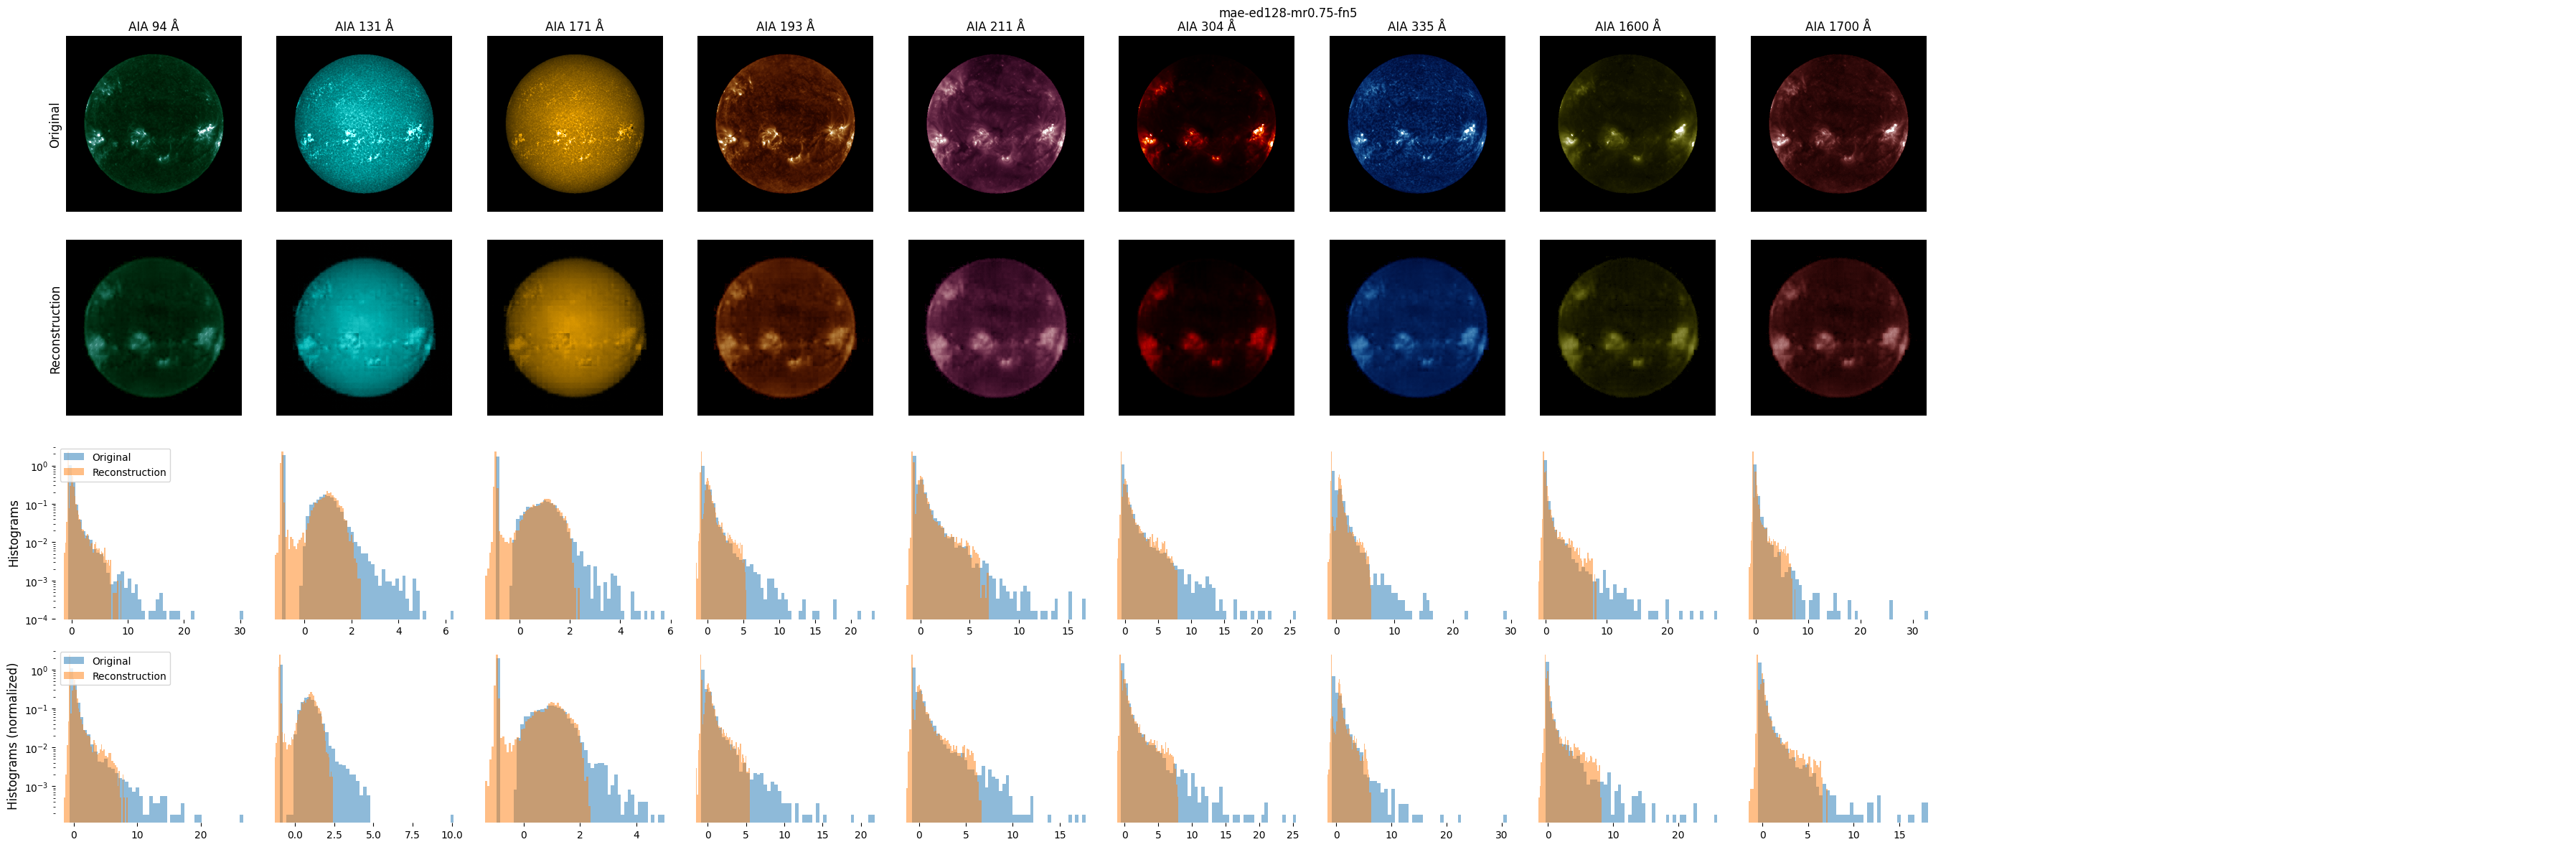

In [16]:
from sdofm.visualisation.sdo import sdo_reconstruction_plot

sdo_reconstruction_plot(
    torch.Tensor(data[:, 0, :, :]), x_hat[0, :, 0, :, :], title="mae-ed128-mr0.75-fn5"
)

Text(0.5, 1.0, '75% masked (yellow=mask)')

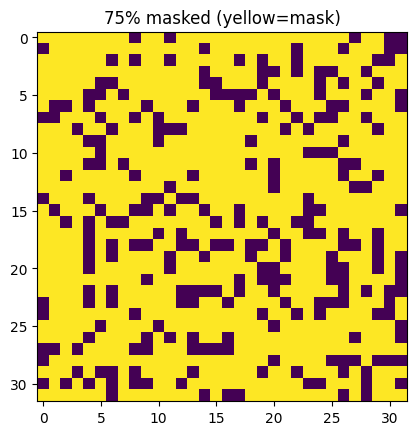

In [21]:
import matplotlib.pyplot as plt

plt.imshow(mask.reshape((32, 32, 5))[:, :, 0])
plt.title("75% masked (yellow=mask)")

In [10]:
512 / 16

32.0